In [11]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_path = "/path/to/data/"
fig_save_path = "/path/to/figures/"

In [2]:
adata = sc.read_h5ad(f"{data_path}20240229_from_rocio_for_manuscript.h5ad")


In [3]:
counts = adata.obs.groupby(["subset", "CAR_Variant"]).count()["orig.ident"].reset_index().rename(columns={"orig.ident":"count"})

/var/folders/54/s3nhktxs0tz7w0f6tsj6pltc0000kp/T/ipykernel_42397/2445388735.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = adata.obs.groupby(["subset", "CAR_Variant"]).count()["orig.ident"].reset_index().rename(columns={"orig.ident":"count"})


In [4]:
counts

,subset,CAR_Variant,count
0,CD4,41BB-41BB-z,933
1,CD4,41BB-CD28-z,1357
2,CD4,41BB-CD40-z,971
3,CD4,41BB-CTLA4-z,311
4,CD4,41BB-IL15RA-z,1051
...,...,...,...
59,CD8,IL15RA-CTLA4-z,1170
60,CD8,IL15RA-IL15RA-z,612
61,CD8,IL15RA-NA-z,1157
62,CD8,NA-NA-NA,1423


# CD4

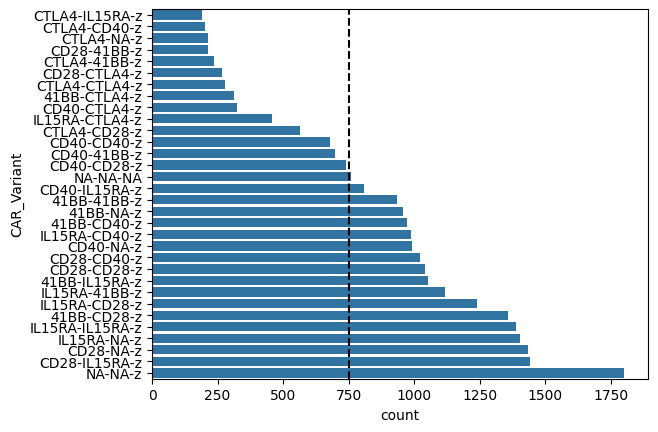

In [12]:
g = sns.barplot(data=counts[counts["subset"]=="CD4"], x="count", y="CAR_Variant", order=counts[counts["subset"]=="CD4"].sort_values("count")["CAR_Variant"])
g.axvline(x=750, color="black", linestyle="--")
plt.savefig(f"{fig_save_path}CD4_CAR_selection.pdf", bbox_inches="tight")
plt.show()

In [6]:
sel_CD4=list(counts.loc[(counts["subset"]=="CD4")&(counts["count"]>750), "CAR_Variant"])
sel_CD4.remove("NA-NA-z")
sel_CD4.remove("NA-NA-NA")

In [7]:
sel_CD4

['41BB-41BB-z',
 '41BB-CD28-z',
 '41BB-CD40-z',
 '41BB-IL15RA-z',
 '41BB-NA-z',
 'CD28-CD28-z',
 'CD28-CD40-z',
 'CD28-IL15RA-z',
 'CD28-NA-z',
 'CD40-IL15RA-z',
 'CD40-NA-z',
 'IL15RA-41BB-z',
 'IL15RA-CD28-z',
 'IL15RA-CD40-z',
 'IL15RA-IL15RA-z',
 'IL15RA-NA-z']

# CD8

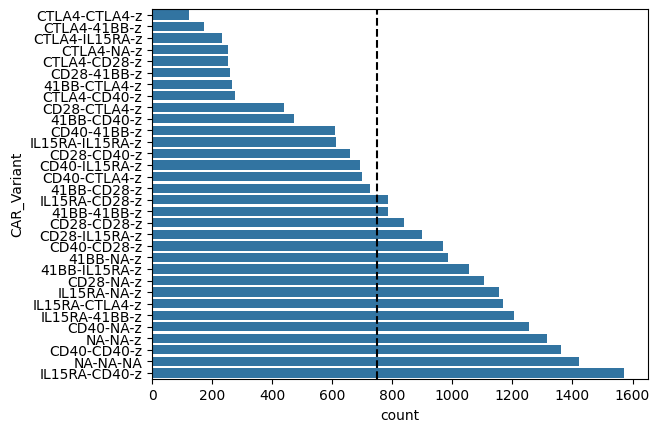

In [13]:
g = sns.barplot(data=counts[counts["subset"]=="CD8"], x="count", y="CAR_Variant", order=counts[counts["subset"]=="CD8"].sort_values("count")["CAR_Variant"])
g.axvline(x=750, color="black", linestyle="--")
plt.savefig(f"{fig_save_path}CD8_CAR_selection.pdf", bbox_inches="tight")
plt.show()

In [9]:
sel_CD8=list(counts.loc[(counts["subset"]=="CD8")&(counts["count"]>750), "CAR_Variant"])
sel_CD8.remove("NA-NA-z")
sel_CD8.remove("NA-NA-NA")

In [10]:
sel_CD8

['41BB-41BB-z',
 '41BB-IL15RA-z',
 '41BB-NA-z',
 'CD28-CD28-z',
 'CD28-IL15RA-z',
 'CD28-NA-z',
 'CD40-CD28-z',
 'CD40-CD40-z',
 'CD40-NA-z',
 'IL15RA-41BB-z',
 'IL15RA-CD28-z',
 'IL15RA-CD40-z',
 'IL15RA-CTLA4-z',
 'IL15RA-NA-z']